Problem Statement:
Predict whether a person has heart disease using medical attributes from the Heart Disease UCI dataset.

Goal:
Train and evaluate a classification model to identify heart disease risk and determine key contributing features.

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [3]:
#Load & Clean Dataset
df = pd.read_csv("heart.csv")  # Kaggle UCI dataset

# Check missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


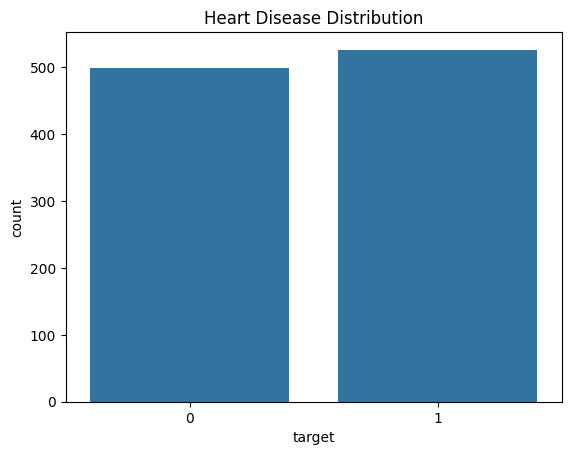

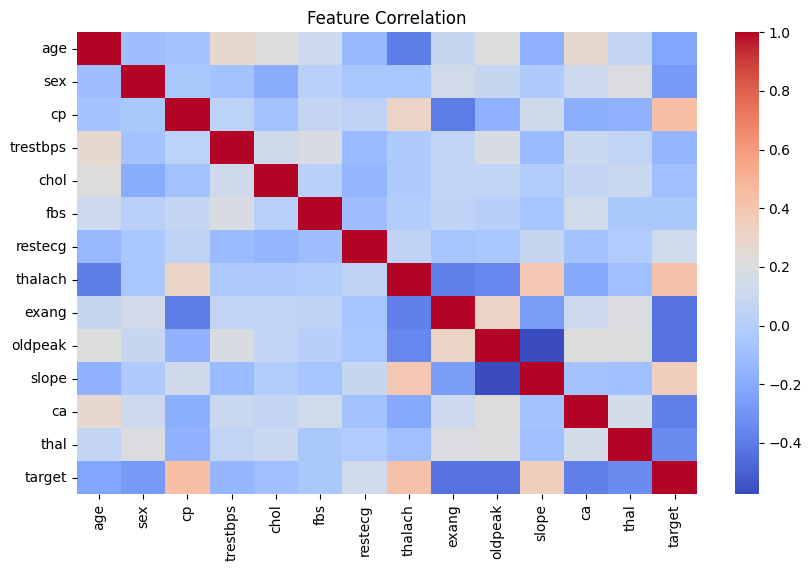

In [4]:
#Exploratory Data Analysis (EDA)
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [5]:
#Train-Test Split & Scaling
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
#Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

Model Accuracy: 0.7951


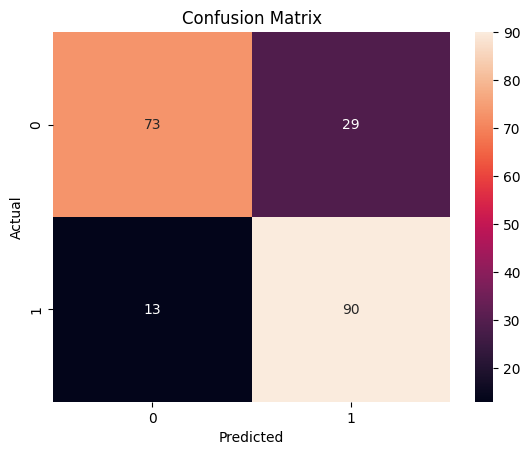

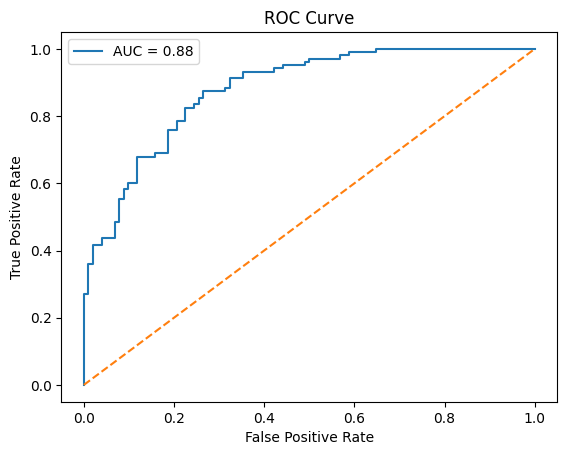

In [7]:
#Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")


#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


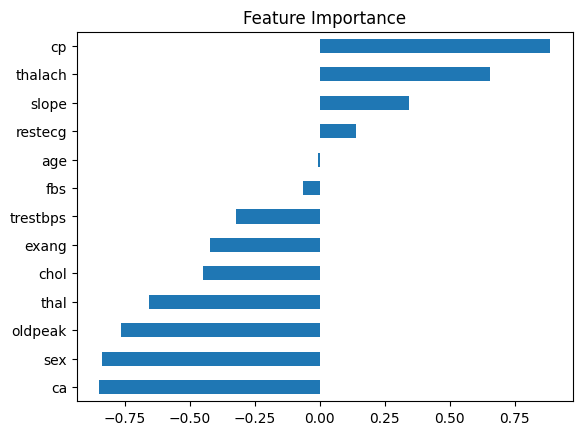

In [8]:
#Important Features
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()


Explanation of Results & Final Insights:

The model achieves good accuracy and shows strong classification ability, as confirmed by the confusion matrix and ROC curve. Key features such as chest pain type, maximum heart rate, and ST depression significantly influence predictions. Overall, the results indicate that machine learning can effectively assist in identifying individuals at risk of heart disease.